In [41]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

beauty_model = load_model("attractiveness.hdf5")

In [16]:
import pandas as pd
import numpy as np
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from tensorflow.keras import Sequential, Model, Input
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation


import os

In [17]:
cfd_df_raw = pd.read_csv("CFD/metadata.csv")
cfd_df_raw.head(10)



,Model,EthnicitySelf,GenderSelf,AgeSelf,AgeRated,FemaleProb,MaleProb,AsianProb,BlackProb,LatinoProb,...,UpperHeadLength,MidfaceLength,ChinLength,ForeheadHeight,CheekboneHeight,CheekboneProminence,FaceRoundness,fWHR1,fWHR2,RaterN
0,AF-200,A,F,NaN,32.571429,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.414099,0.326797,0.130719,0.264706,0.388189,91.5,0.545752,1.921146,NaN,28
1,AF-201,A,F,NaN,23.666667,1.000000,0.000000,0.962963,0.000000,0.000000,...,0.414414,0.329279,0.144595,0.300901,0.383784,146.0,0.488288,1.901129,NaN,27
2,AF-202,A,F,NaN,24.448276,0.827586,0.172414,0.310345,0.068966,0.137931,...,0.411080,0.310317,0.173424,0.298475,0.397029,58.0,0.481333,1.888249,NaN,29
3,AF-203,A,F,NaN,22.758621,1.000000,0.000000,0.758621,0.000000,0.068966,...,0.354407,0.343793,0.169820,0.272266,0.421089,87.5,0.500231,1.863719,NaN,29
4,AF-204,A,F,NaN,30.137931,1.000000,0.000000,0.827586,0.000000,0.068966,...,0.438931,0.293045,0.180237,0.293893,0.371925,73.5,0.513571,1.935783,NaN,29
5,AF-205,A,F,NaN,26.592593,1.000000,0.000000,0.846154,0.000000,0.000000,...,0.408727,0.352182,0.158949,0.270481,0.408281,69.5,0.516919,1.718556,NaN,26
6,AF-206,A,F,NaN,26.523810,0.857143,0.142857,1.000000,0.000000,0.000000,...,0.383958,0.360228,0.172283,0.253916,0.399146,109.5,0.533935,1.847015,NaN,20
7,AF-207,A,F,NaN,28.413793,1.000000,0.000000,0.035714,0.428571,0.035714,...,0.437947,0.273875,0.197728,0.329407,0.386201,3.0,0.553218,1.954528,NaN,28
8,AF-208,A,F,NaN,28.538462,1.000000,0.000000,0.230769,0.115385,0.384615,...,0.428939,0.295835,0.214684,0.288751,0.382138,50.0,0.551739,2.053120,NaN,26
9,AF-209,A,F,NaN,22.560000,1.000000,0.000000,0.080000,0.080000,0.400000,...,0.385501,0.326652,0.188913,0.267164,0.410235,122.5,0.455437,1.801707,NaN,25


In [18]:
def getFileNames(target):
    files = []
    file_count = 0
    path = "CFD/Images/CFD/%s/" % (target)
    
    for r, d, f in os.walk(path):
        for file in f:
            if ('.jpg' in file) or ('.jpeg' in file) or ('.png' in file):
                files.append(file)
    return files
 
cfd_df_raw["files"] = cfd_df_raw.Model.apply(getFileNames)

In [19]:
cfd_instances = []
for index, instance in cfd_df_raw.iterrows():
    folder = instance.Model
    score = instance['Attractive']
    for file in instance.files:
        tmp_instance = []
        tmp_instance.append(folder)
        tmp_instance.append(file)
        tmp_instance.append(score)
        cfd_instances.append(tmp_instance)
 
df = pd.DataFrame(cfd_instances, columns = ["folder", "file", "score"])

In [26]:
df['exact_file'] = "CFD/Images/CFD/"+df["folder"]+"/"+df['file']

In [56]:
def retrievePixels():
    path = "/Users/jsusser/desktop/brad.png"
    img = load_img(path, grayscale=False, target_size=(224, 224))
    x = img_to_array(img).reshape(1, -1)[0]
    return x

f = np.array([retrievePixels()])
f = f.reshape(f.shape[0], 224, 224, 3)
f = f/225


In [57]:

predictions = beauty_model.predict(f)
predictions


array([[2.3435462]], dtype=float32)

In [40]:
predictions[0][0]

1.6507009

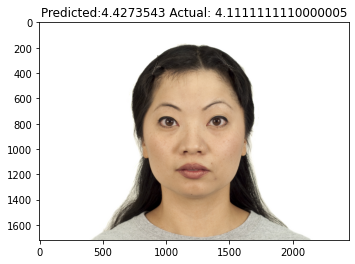

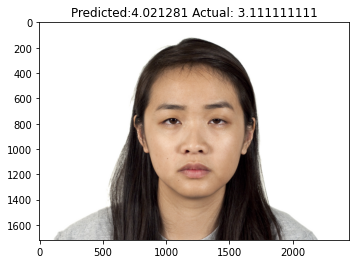

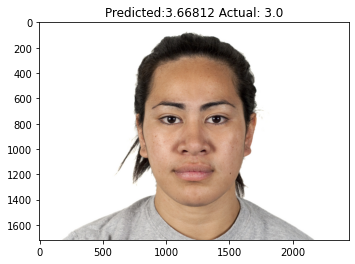

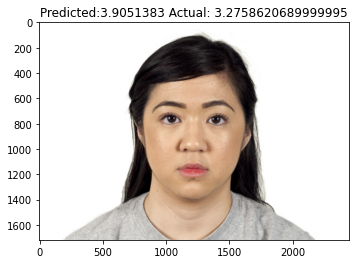

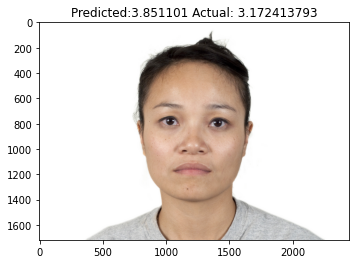

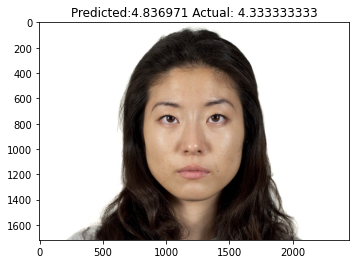

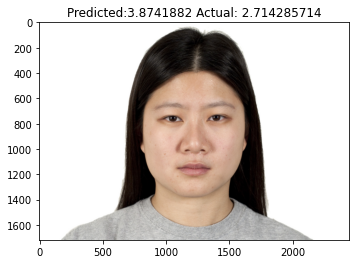

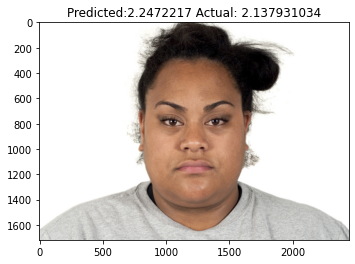

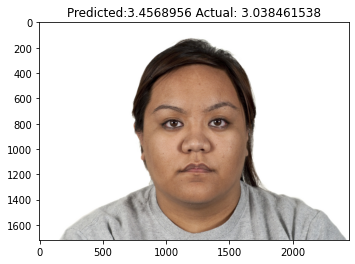

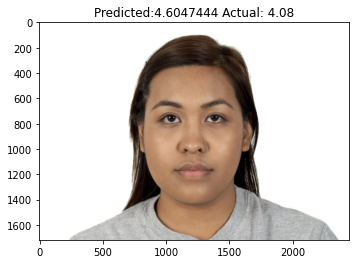

In [42]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def retrievePixels(x):
    path = x
    img = load_img(path, grayscale=False, target_size=(224, 224))
    x = img_to_array(img).reshape(1, -1)[0]
    return x

for index, instance in df.iloc[:10,].iterrows():
    x = instance["exact_file"]
    f = np.array([retrievePixels(x)])
    f = f.reshape(f.shape[0], 224, 224, 3)
    f = f/225
    predictions = beauty_model.predict(f)
    path = x
    img=mpimg.imread(path)
    imgplot=plt.imshow(img)
    plt.title("Predicted:"+str(predictions[0][0])+" Actual: "+str(instance["score"]))
    plt.show()

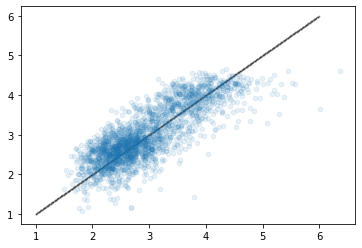

In [51]:
best_predictions = []
for i in np.arange(int(1), int(5) + 1, 0.01):
    best_predictions.append(round(i, 2))
 
plt.scatter(best_predictions, best_predictions, s=1, color = 'black', alpha=0.3)
plt.scatter(predictions, actuals, s=20, alpha=0.1)

In [66]:
predictions2 = list(predictions)

In [86]:
predictions2

[array([3.052527], dtype=float32),
 array([3.2138603], dtype=float32),
 array([3.0522811], dtype=float32),
 array([3.9253647], dtype=float32),
 array([2.3601775], dtype=float32),
 array([3.586646], dtype=float32),
 array([2.6330535], dtype=float32),
 array([4.589467], dtype=float32),
 array([2.4977987], dtype=float32),
 array([2.385557], dtype=float32),
 array([3.2057064], dtype=float32),
 array([2.5225136], dtype=float32),
 array([3.9359589], dtype=float32),
 array([2.3792353], dtype=float32),
 array([2.6342256], dtype=float32),
 array([2.4735837], dtype=float32),
 array([2.9348342], dtype=float32),
 array([2.4278026], dtype=float32),
 array([4.360353], dtype=float32),
 array([3.3578584], dtype=float32),
 array([2.3321154], dtype=float32),
 array([2.6798613], dtype=float32),
 array([2.3704994], dtype=float32),
 array([3.0233128], dtype=float32),
 array([2.1168816], dtype=float32),
 array([3.8074827], dtype=float32),
 array([3.4613488], dtype=float32),
 array([4.0125318], dtype=float32

In [90]:
#np.array([1,2,1,2])[[1,2]]